In [40]:
%matplotlib inline
import os
import sys
from matplotlib import *
from pylab import *

In [41]:
def get_underscore_locations(file):
    underscore_locations = [index for index, character in enumerate(file)
                            if character == "_"]
    return underscore_locations

34385.920848266454 gamma_vs_detuning_16112022_overnight_26
-436217.98761206854 gamma_vs_detuning_16112022_overnight_26
77189.62239006709 gamma_vs_detuning_16112022_overnight_27
34815.754182288605 gamma_vs_detuning_16112022_overnight_27
-14315.123554115158 gamma_vs_detuning_16112022_overnight_27


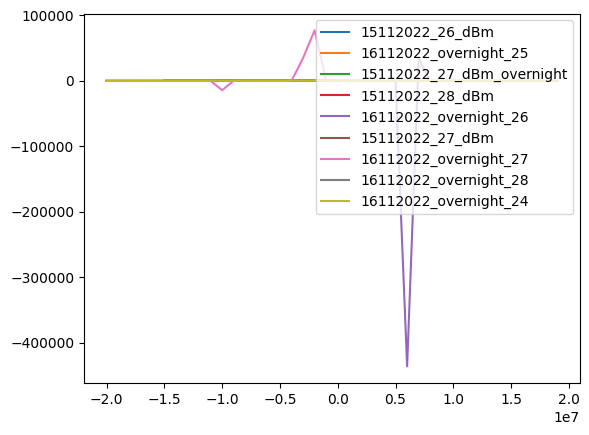

In [55]:
parent_folder = os.path.dirname(sys.path[0])
path = os.path.join(parent_folder, "Gamma Results")
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    with open(file_path, "r") as file:
        file.readline()
        file_contents = file.readlines()
    file_lines_decomposed = [[float(number) for number in line.strip().split('\t')] for line in file_contents]
    #file_lines_decomposed = [i for i in file_lines_decomposed if abs(i[1]) < 200]
    detuning, gamma = zip(*file_lines_decomposed)
    for i in gamma:
        if abs(i) > 200:
            print(i, file_name)
    plt.plot(detuning, gamma, label = file_name[18:])
plt.legend(loc="upper right")
    